In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from collections.abc import Callable
from typing import List

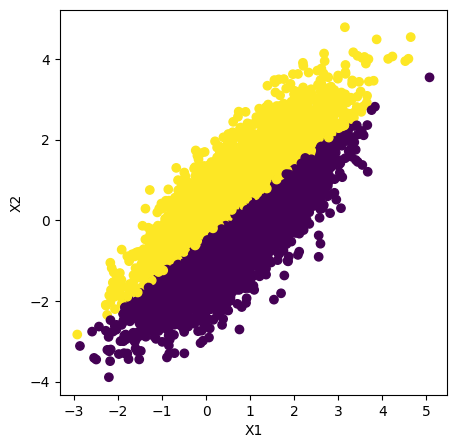

In [21]:
# Need to create a synthetic dataset
np.random.seed(42)
dim = 2
X = np.random.normal(size=(10000, dim))
normal = np.eye(dim)[0]
y = 2 * (X @ normal > 0).astype(int) - 1
# A = np.array([[1, 2], [.1, -.4]]); b = np.array([0, 0])
A = np.random.rand(dim, dim)
b = np.random.rand(dim)
X = X @ A.T + b # Vector broadcast

x_data = np.hstack((np.ones((X.shape[0], 1)), X))
y_data = y

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [11]:
def gd(grad_f, f, x0, max_iters, tol, t_fixed, bt_alpha, bt_beta):
    x = x0
    trajectory = [x.copy()]
    for k in range(1, max_iters + 1):
        grad = grad_f(x)
        if t_fixed is not None:
            t = t_fixed   # Do not use backtracking
        else:
            t_bt = 1      # Opted to use backtracking
            while f(x-t_bt*grad) > f(x) - bt_alpha*t_bt*np.linalg.norm(grad, ord=2)**2:
                t_bt *= bt_beta
            t = t_bt
        x_new = x - t * grad
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return np.array(trajectory)

# Define Nesterov Accelerated Gradient Descent with Tseng parameters and backtracking line search
def gd_nesterov1(grad_f, f, x0, max_iters, tol, bt_alpha, bt_beta):
    x = x0
    y = x0
    trajectory = [x.copy()]
    for k in range(1, max_iters + 1):
        grad = grad_f(y)

        t = 1      # Opted to use backtracking
        while f(y-t*grad) > f(y) - bt_alpha*t*np.linalg.norm(grad, ord=2)**2:
            t *= bt_beta
        x_new = y - t * grad
        y = x_new + (k - 1) / (k + 2) * (x_new - x)
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return np.array(trajectory)

In [12]:
def generate(x_data: np.ndarray, y_data: np.ndarray, mu: float):
  f_unreg = lambda w: np.mean(np.log(1 + np.exp(-(x_data @ w) * y_data)))
  f = lambda w: np.mean(np.log(1 + np.exp(-(x_data @ w) * y_data))) +  (mu/2) * np.linalg.norm(w, ord=2)**2
  grad_f = lambda w: (-1/x_data.shape[0]) * x_data.T @ ( (1 / (1 + np.exp((x_data @ w) * y_data))) * y_data) + mu*w
  return (f_unreg, f, grad_f)

In [20]:
f_unreg, f, grad_f = generate(x_data, y_data, 0.0000000001)
init = np.zeros(x_data.shape[-1])
# history = gd(grad_f, f, init, 1000000, 0.0001, 0.1)

tol = 1e-3; max_iters = 1000000;

# Iterations for gradient descent
x_gd_lgst = gd(grad_f, f, init, max_iters, tol, None, 0.5, 0.8)
f_gd_lgst = np.apply_along_axis(f, 1, x_gd_lgst)
f_unreg_gd_lgst = np.apply_along_axis(f_unreg, 1, x_gd_lgst)

# Iterations for Nesterov
x_nag_lgst = gd_nesterov1(grad_f, f, init, max_iters, tol, 0.5, 0.8)
f_nag_lgst = np.apply_along_axis(f, 1, x_nag_lgst)
f_unreg_nag_lgst = np.apply_along_axis(f_unreg, 1, x_nag_lgst)

# pred = np.sign((2 / np.exp(-x_data @ history[-1]))-1)
# print(np.mean(pred == y_data))
# print(history.shape)
# print(history[-1])
# print(f_unreg(history[-1]))
plt.figure(figsize=(8, 5))
plt.plot(f_gd_lgst, label="GD")
plt.plot(f_nag_lgst, label="NAG")
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Objective Value (log scale)")
plt.title("Comparison of Optimization Methods (cond=50)")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-12-8d3ae0b7ee52>:4: RuntimeWarning: overflow encountered in exp
  grad_f = lambda w: (-1/x_data.shape[0]) * x_data.T @ ( (1 / (1 + np.exp((x_data @ w) * y_data))) * y_data) + mu*w


KeyboardInterrupt: 

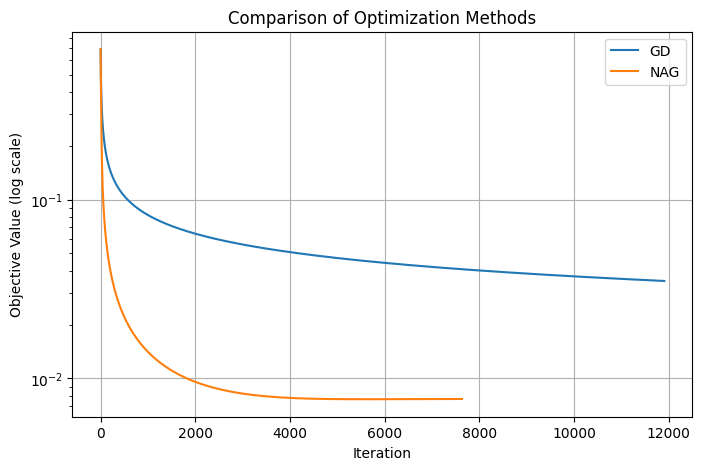

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(f_gd_lgst, label="GD")
plt.plot(f_nag_lgst, label="NAG")
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Objective Value (log scale)")
plt.title("Comparison of Optimization Methods")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
history.shape

NameError: name 'history' is not defined

In [ ]:
pred

array([ 1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,
       -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,
       -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.])

[  74.09139197 -152.98870956  173.46029169]
0.004730220568902173


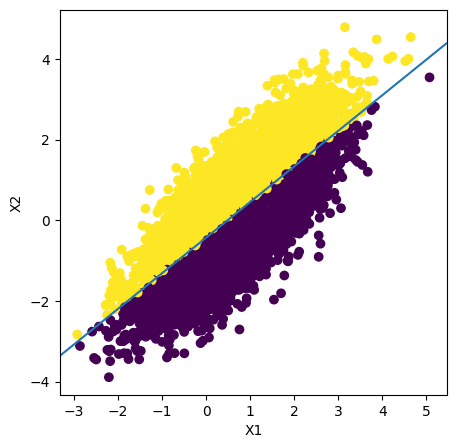

In [18]:
print(x_nag_lgst[-1])
print(f_unreg(x_nag_lgst[-1]))
w = x_nag_lgst[-1]

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axline(xy1=(0, -w[0]/w[2]), slope=-w[1]/w[2])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()